# Real-world Data Wrangling

In [6]:
!python -m pip install yfinance

Defaulting to user installation because normal site-packages is not writeable


In [2]:
!pip install numpy==1.24.3

Defaulting to user installation because normal site-packages is not writeable


In [3]:
!pip install matplotlib --upgrade

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 45.3 MB/s eta 0:00:0000:0100:01


## **1.** Problem Statement & Gathering Data

#### The objective of this project is to compare both Vanguard's Large-Cap and Small Cap ETF Index Funds and analyze which will perform better within the span of 2 years. 

In [1]:
#Imports
import pandas as pd
import requests
#Using Yahoo Finance API
import yfinance as yf

#### **Dataset 1**

Type: *CSV File* 

Method: *Download Manually* (Link: https://www.investing.com/etfs/vanguard-large-cap-historical-data)

Dataset variables:

*   *Variable 1 Date* : Date
*   *Variable 2 Price* : Price of Stock
*   *Variable 3 Open* : Price of Stock at the beginning of the market
*   *Variable 4 High* : Price of the Stock at its highest during the day
*   *Variable 5 Low* : Price of the Stock at its lowest during the day
*   *Variable 6 Vol.* : Number of shares being traded at the given day
*   *Variable 7 Change %* : Change in the price between the previous day

In [2]:
#FILL IN 1st data gathering and loading method
df_large = pd.read_csv('VV Large Index ETF Stock Price History.csv')

In [3]:
df_large.shape

(502, 7)

#### Dataset 2

Type: *CSV File* 

Method: *Download using API* (Downloaded From: Yahoo Finance API)

Dataset variables:

*   *Variable 1 Price* : Date
*   *Variable 2 Ajd Close* : Closing price after adjustments for all applicable splits and dividend distributions
*   *Variable 3 Close* : Price of the Stock at the end of the day
*   *Variable 4 High* : Price of the Stock at its highest during the day
*   *Variable 5 Low* : Price of the Stock at its lowest during the day
*   *Variable 6 Open* : Price of Stock at the beginning of the market
*   *Variable 7 Volume* : Number of shares being traded at the given day

In [4]:
ticker = "VB"  
start_date = "2022-10-08"
end_date = "2024-10-08"

# Fetch historical data
data = yf.download(ticker, start=start_date, end=end_date)

# Save data to CSV
data.to_csv("VB_stock_data.csv")

[*********************100%***********************]  1 of 1 completed


In [5]:
df_small = pd.read_csv('VB_stock_data.csv')

## 2. Assess data

Assess the data according to data quality and tidiness metrics using the report below.

### Quality Issue 1:

In [6]:
#FILL IN - Inspecting the dataframe visually
df_large.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,10/08/2024,262.36,261.61,262.65,261.33,130.45K,0.80%
1,10/07/2024,260.27,262.14,262.38,259.97,180.18K,-1.04%
2,10/04/2024,263.01,262.52,263.08,260.74,138.75K,1.03%
3,10/03/2024,260.32,260.25,261.37,259.45,262.11K,-0.25%
4,10/02/2024,260.98,260.39,261.33,259.33,164.16K,0.01%


In [7]:
df_large.tail()

,Date,Price,Open,High,Low,Vol.,Change %
497,10/14/2022,163.27,168.26,168.94,163.00,905.60K,-2.34%
498,10/13/2022,167.18,159.67,167.86,159.02,1.25M,2.58%
499,10/12/2022,162.98,163.64,164.39,162.86,642.88K,-0.30%
500,10/11/2022,163.47,163.77,165.86,162.51,1.41M,-0.73%
501,10/10/2022,164.68,166.42,166.67,163.56,446.45K,-0.80%


In [8]:
#FILL IN - Inspecting the dataframe programmatically
df_large.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 502 entries, 0 to 501
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      502 non-null    object 
 1   Price     502 non-null    float64
 2   Open      502 non-null    float64
 3   High      502 non-null    float64
 4   Low       502 non-null    float64
 5   Vol.      502 non-null    object 
 6   Change %  502 non-null    object 
dtypes: float64(4), object(3)
memory usage: 27.6+ KB


There are 2 quality issues:

Date should be in the date/time format instead of object.
Vol. should be in numaric format instead of an object.


### Quality Issue 2:

In [9]:
#FILL IN - Inspecting the dataframe visually
df_small.head()

,Price,Adj Close,Close,High,Low,Open,Volume
0,Ticker,VB,VB,VB,VB,VB,VB
1,Date,NaN,NaN,NaN,NaN,NaN,NaN
2,2022-10-10,168.95057678222656,174.5800018310547,176.57000732421875,173.36000061035156,176.2100067138672,645600
3,2022-10-11,168.87313842773438,174.5,176.8000030517578,171.69000244140625,173.7100067138672,1022800
4,2022-10-12,167.99252319335938,173.58999633789062,174.85000610351562,172.36000061035156,174.5500030517578,674200


In [10]:
df_small.tail()

,Price,Adj Close,Close,High,Low,Open,Volume
498,2024-10-01,234.7899932861328,234.7899932861328,237.1300048828125,233.32000732421875,237.07000732421875,701000
499,2024-10-02,234.8000030517578,234.8000030517578,235.7100067138672,233.39999389648438,234.3800048828125,393700
500,2024-10-03,233.75999450683594,233.75999450683594,234.39999389648438,232.35000610351562,233.88999938964844,568400
501,2024-10-04,236.6300048828125,236.6300048828125,236.99000549316406,234.47000122070312,236.3800048828125,407600
502,2024-10-07,234.72999572753906,234.72999572753906,235.9199981689453,233.27000427246094,235.9199981689453,635100


In [11]:
#FILL IN - Inspecting the dataframe programmatically
df_small.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      503 non-null    object
 1   Adj Close  502 non-null    object
 2   Close      502 non-null    object
 3   High       502 non-null    object
 4   Low        502 non-null    object
 5   Open       502 non-null    object
 6   Volume     502 non-null    object
dtypes: object(7)
memory usage: 27.6+ KB


There are 2 quality issues within this dataframe as well. 

Price column contains the Date and should be converted to date/time format. 

Adj Close, Close, High, Low, Open, and Volume should be a numeric data type not an object. 

### Tidiness Issue

#### Inspecting Large ETF 

In [12]:
#FILL IN - Inspecting the dataframe visually
df_large.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,10/08/2024,262.36,261.61,262.65,261.33,130.45K,0.80%
1,10/07/2024,260.27,262.14,262.38,259.97,180.18K,-1.04%
2,10/04/2024,263.01,262.52,263.08,260.74,138.75K,1.03%
3,10/03/2024,260.32,260.25,261.37,259.45,262.11K,-0.25%
4,10/02/2024,260.98,260.39,261.33,259.33,164.16K,0.01%


In [13]:
df_large.tail()

,Date,Price,Open,High,Low,Vol.,Change %
497,10/14/2022,163.27,168.26,168.94,163.00,905.60K,-2.34%
498,10/13/2022,167.18,159.67,167.86,159.02,1.25M,2.58%
499,10/12/2022,162.98,163.64,164.39,162.86,642.88K,-0.30%
500,10/11/2022,163.47,163.77,165.86,162.51,1.41M,-0.73%
501,10/10/2022,164.68,166.42,166.67,163.56,446.45K,-0.80%


In [14]:
#FILL IN - Inspecting the dataframe programmatically
df_large.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 502 entries, 0 to 501
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      502 non-null    object 
 1   Price     502 non-null    float64
 2   Open      502 non-null    float64
 3   High      502 non-null    float64
 4   Low       502 non-null    float64
 5   Vol.      502 non-null    object 
 6   Change %  502 non-null    object 
dtypes: float64(4), object(3)
memory usage: 27.6+ KB


#### Inspecting Small ETF 

In [15]:
#FILL IN - Inspecting the dataframe visually
df_small.head()

,Price,Adj Close,Close,High,Low,Open,Volume
0,Ticker,VB,VB,VB,VB,VB,VB
1,Date,NaN,NaN,NaN,NaN,NaN,NaN
2,2022-10-10,168.95057678222656,174.5800018310547,176.57000732421875,173.36000061035156,176.2100067138672,645600
3,2022-10-11,168.87313842773438,174.5,176.8000030517578,171.69000244140625,173.7100067138672,1022800
4,2022-10-12,167.99252319335938,173.58999633789062,174.85000610351562,172.36000061035156,174.5500030517578,674200


In [16]:
df_small.tail()

,Price,Adj Close,Close,High,Low,Open,Volume
498,2024-10-01,234.7899932861328,234.7899932861328,237.1300048828125,233.32000732421875,237.07000732421875,701000
499,2024-10-02,234.8000030517578,234.8000030517578,235.7100067138672,233.39999389648438,234.3800048828125,393700
500,2024-10-03,233.75999450683594,233.75999450683594,234.39999389648438,232.35000610351562,233.88999938964844,568400
501,2024-10-04,236.6300048828125,236.6300048828125,236.99000549316406,234.47000122070312,236.3800048828125,407600
502,2024-10-07,234.72999572753906,234.72999572753906,235.9199981689453,233.27000427246094,235.9199981689453,635100


In [17]:
#FILL IN - Inspecting the dataframe programmatically
df_small.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      503 non-null    object
 1   Adj Close  502 non-null    object
 2   Close      502 non-null    object
 3   High       502 non-null    object
 4   Low        502 non-null    object
 5   Open       502 non-null    object
 6   Volume     502 non-null    object
dtypes: object(7)
memory usage: 27.6+ KB


In [18]:
#Checking for duplicates
print(df_small.duplicated().sum())
print(df_large.duplicated().sum())

0
0


### Summary: Data Quality & Tidiness Issues

#### Tidiness Issues:

**1.** In df_small, the first two rows seem to contain metadata (like Ticker and Date labels) instead of actual data. The metadata rows do not represent actual observations or measurements. Instead, they contain labels that should be used as column headers. These rows should be removed to tidy up the dataframe.

**2.** In df_large, the "Vol." column contains values in different formats such as K for thousands and M for Millions. Each variable should be represented in a single format. Mixing formats within a column violates the tidy data principle that there should not be multiple variable in one column.

#### Quality Issues: 

**1.** The first column of df_small is mislabeled as Price instead of Date. This should also be changed to the date/time datatype.

**2.** Date should be changed to a date/time data type instead of an object data type in both dataframes.

**3.** Vol. in df_large is not in the right data type. Should be a numeric data type.

**4.** In df_small all variables are in the wrong datatype, all columns should be a numeric datatype except the date.

## 3. Clean data


In [19]:
# Make copies of the datasets to ensure the raw dataframes 
# are not impacted

cleaned_df_large = df_large.copy()
cleaned_df_small = df_small.copy()

### **Quality Issue 1 for Large ETF: Date should be in the date/time data type instead of object.**

In [20]:
# Convert 'Date' column to datetime format in df_large
cleaned_df_large['Date'] = pd.to_datetime(cleaned_df_large['Date'], format='%m/%d/%Y')

In [21]:
# Validate the cleaning was successful
cleaned_df_large['Date'].dtypes

dtype('<M8[ns]')

In [22]:
cleaned_df_large.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 502 entries, 0 to 501
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      502 non-null    datetime64[ns]
 1   Price     502 non-null    float64       
 2   Open      502 non-null    float64       
 3   High      502 non-null    float64       
 4   Low       502 non-null    float64       
 5   Vol.      502 non-null    object        
 6   Change %  502 non-null    object        
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 27.6+ KB


### **Tidiness & Quality Issue 2 for Large ETF: Vol. should be in numaric format instead of an object & Converting K and M variables into value form**

In [23]:
# Creating a function to convert the Vol. column into a numeric data type

def convert_volume(vol):
    if 'K' in vol:
        return float(vol.replace('K', '')) * 1000
    elif 'M' in vol:
        return float(vol.replace('M', '')) * 1000000
    else:
        return float(vol)  # In case it's already a number without 'K' or 'M'

# Apply the conversion function to the 'Vol.' column
cleaned_df_large['Vol.'] = cleaned_df_large['Vol.'].apply(convert_volume)

In [24]:
# Convering Vol. into a Int instead of float
cleaned_df_large['Vol.'] = cleaned_df_large['Vol.'].astype(int)

In [25]:
#FILL IN - Validate the cleaning was successful
cleaned_df_large.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,2024-10-08,262.36,261.61,262.65,261.33,130449,0.80%
1,2024-10-07,260.27,262.14,262.38,259.97,180180,-1.04%
2,2024-10-04,263.01,262.52,263.08,260.74,138750,1.03%
3,2024-10-03,260.32,260.25,261.37,259.45,262110,-0.25%
4,2024-10-02,260.98,260.39,261.33,259.33,164160,0.01%


In [26]:
cleaned_df_large.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 502 entries, 0 to 501
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      502 non-null    datetime64[ns]
 1   Price     502 non-null    float64       
 2   Open      502 non-null    float64       
 3   High      502 non-null    float64       
 4   Low       502 non-null    float64       
 5   Vol.      502 non-null    int64         
 6   Change %  502 non-null    object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 27.6+ KB


### **Tidiness Issue 1 for Small ETF: Renaming the first column to Date instead of price.**

In [27]:
cleaned_df_small.rename(columns={'Price': 'Date'}, inplace= True)

In [28]:
# Confirming changes have been made.
cleaned_df_small.head()

,Date,Adj Close,Close,High,Low,Open,Volume
0,Ticker,VB,VB,VB,VB,VB,VB
1,Date,NaN,NaN,NaN,NaN,NaN,NaN
2,2022-10-10,168.95057678222656,174.5800018310547,176.57000732421875,173.36000061035156,176.2100067138672,645600
3,2022-10-11,168.87313842773438,174.5,176.8000030517578,171.69000244140625,173.7100067138672,1022800
4,2022-10-12,167.99252319335938,173.58999633789062,174.85000610351562,172.36000061035156,174.5500030517578,674200


### **Tidiness Issue 2 for Small ETF: Removing first 2 rows.**

In [29]:
# Remove the first two rows of cleaned_df_small
cleaned_df_small = cleaned_df_small.drop(index=[0, 1])

In [30]:
# Confirming the first 2 rows have been dropped.
cleaned_df_small.head()

,Date,Adj Close,Close,High,Low,Open,Volume
2,2022-10-10,168.95057678222656,174.5800018310547,176.57000732421875,173.36000061035156,176.2100067138672,645600
3,2022-10-11,168.87313842773438,174.5,176.8000030517578,171.69000244140625,173.7100067138672,1022800
4,2022-10-12,167.99252319335938,173.58999633789062,174.85000610351562,172.36000061035156,174.5500030517578,674200
5,2022-10-13,171.58287048339844,177.3000030517578,178.22000122070312,168.64999389648438,170.2899932861328,847000
6,2022-10-14,167.24734497070312,172.82000732421875,179.8000030517578,172.58999633789062,178.6999969482422,499400


### Tidiness Issue 3 for Small ETF: Index does not start with 0.

In [31]:
# Because we removed the first 2 index, we have another problem.
# Indexes should always start with 0, Let's fix that. 

cleaned_df_small.reset_index(drop= True, inplace= True)

In [32]:
# Confirming that index have been reset.

cleaned_df_small.head()

,Date,Adj Close,Close,High,Low,Open,Volume
0,2022-10-10,168.95057678222656,174.5800018310547,176.57000732421875,173.36000061035156,176.2100067138672,645600
1,2022-10-11,168.87313842773438,174.5,176.8000030517578,171.69000244140625,173.7100067138672,1022800
2,2022-10-12,167.99252319335938,173.58999633789062,174.85000610351562,172.36000061035156,174.5500030517578,674200
3,2022-10-13,171.58287048339844,177.3000030517578,178.22000122070312,168.64999389648438,170.2899932861328,847000
4,2022-10-14,167.24734497070312,172.82000732421875,179.8000030517578,172.58999633789062,178.6999969482422,499400


### Quality Issue 1 for Small ETF: Date should be in date/time datatype not object.

In [33]:
# Convert 'Date' column to datetime datatype in df_small
cleaned_df_small['Date'] = pd.to_datetime(cleaned_df_small['Date'])

In [34]:
# Only keeping the Year Month and Day
cleaned_df_small['Date'] = cleaned_df_small['Date'].dt.date

#Converting back to datetime datatype
cleaned_df_small['Date'] = pd.to_datetime(cleaned_df_small['Date'])

In [35]:
# Confirming changes
cleaned_df_small.head()

,Date,Adj Close,Close,High,Low,Open,Volume
0,2022-10-10,168.95057678222656,174.5800018310547,176.57000732421875,173.36000061035156,176.2100067138672,645600
1,2022-10-11,168.87313842773438,174.5,176.8000030517578,171.69000244140625,173.7100067138672,1022800
2,2022-10-12,167.99252319335938,173.58999633789062,174.85000610351562,172.36000061035156,174.5500030517578,674200
3,2022-10-13,171.58287048339844,177.3000030517578,178.22000122070312,168.64999389648438,170.2899932861328,847000
4,2022-10-14,167.24734497070312,172.82000732421875,179.8000030517578,172.58999633789062,178.6999969482422,499400


In [36]:
cleaned_df_small.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501 entries, 0 to 500
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       501 non-null    datetime64[ns]
 1   Adj Close  501 non-null    object        
 2   Close      501 non-null    object        
 3   High       501 non-null    object        
 4   Low        501 non-null    object        
 5   Open       501 non-null    object        
 6   Volume     501 non-null    object        
dtypes: datetime64[ns](1), object(6)
memory usage: 27.5+ KB


### Quality Issue 2 for Small ETF: All Columns except Date should be a numeric datatype not object.

In [37]:
numeric_columns = ['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume']
for column in numeric_columns:
    cleaned_df_small[column] = pd.to_numeric(cleaned_df_small[column], errors= 'coerce')

In [38]:
# Confirming that columns are the right data type
cleaned_df_small.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501 entries, 0 to 500
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       501 non-null    datetime64[ns]
 1   Adj Close  501 non-null    float64       
 2   Close      501 non-null    float64       
 3   High       501 non-null    float64       
 4   Low        501 non-null    float64       
 5   Open       501 non-null    float64       
 6   Volume     501 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 27.5 KB


### **Remove unnecessary variables and combine datasets**

In [39]:
# Removing unnecessary variables and creating subsets

subset_cleaned_df_small = cleaned_df_small[['Date', 'Close', 'Volume']]
subset_cleaned_df_large = cleaned_df_large[['Date', 'Price']]

In [40]:
# Merging subsets

merged_df = pd.merge(subset_cleaned_df_large, subset_cleaned_df_small, on=['Date'], how='inner')
merged_df.head()

,Date,Price,Close,Volume
0,2024-10-07,260.27,234.729996,635100
1,2024-10-04,263.01,236.630005,407600
2,2024-10-03,260.32,233.759995,568400
3,2024-10-02,260.98,234.800003,393700
4,2024-10-01,260.95,234.789993,701000


In [41]:
# Renaming columns

merged_df.rename(columns={'Price': 'Large-Cap ETF', 'Close': 'Small-Cap ETF', 'Volume': 'Small Volume'}, inplace= True)
merged_df.head()

,Date,Large-Cap ETF,Small-Cap ETF,Small Volume
0,2024-10-07,260.27,234.729996,635100
1,2024-10-04,263.01,236.630005,407600
2,2024-10-03,260.32,233.759995,568400
3,2024-10-02,260.98,234.800003,393700
4,2024-10-01,260.95,234.789993,701000


## 4. Update your data store
Update your local database/data store with the cleaned data, following best practices for storing your cleaned data:

- Must maintain different instances / versions of data (raw and cleaned data)
- Must name the dataset files informatively
- Ensure both the raw and cleaned data is saved to your database/data store

In [42]:
#FILL IN - saving data
cleaned_df_large.to_csv('cleaned_large_cap_etf_data.csv', index=False)
cleaned_df_small.to_csv('cleaned_small_cap_etf_data.csv', index=False)
merged_df.to_csv('merged_etf_data.csv', index=False)

## 5. Answer the research question

*Research question:* FILL IN from answer to Step 1

In [43]:
# Making the Date column the index
merged_df.set_index('Date', inplace= True)

In [44]:
# Checking if the date is the index
merged_df.head()

,Large-Cap ETF,Small-Cap ETF,Small Volume
Date,,,
2024-10-07,260.27,234.729996,635100
2024-10-04,263.01,236.630005,407600
2024-10-03,260.32,233.759995,568400
2024-10-02,260.98,234.800003,393700
2024-10-01,260.95,234.789993,701000


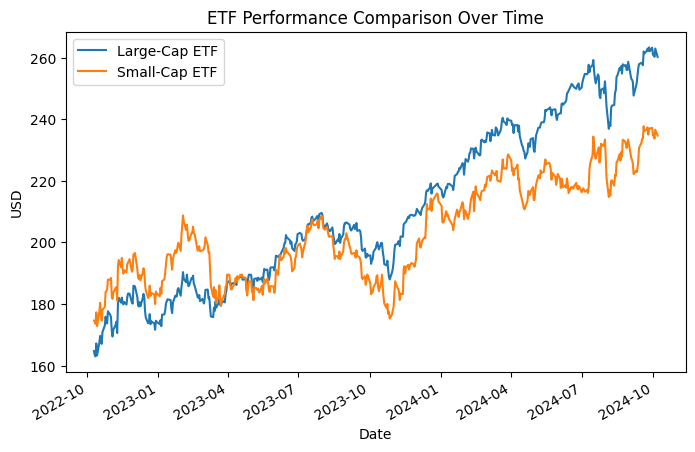

In [45]:
#Visual 1: Lineplot via pandas
merged_df[['Large-Cap ETF', 'Small-Cap ETF']].plot(figsize=(8, 5), title='ETF Performance Comparison Over Time', ylabel= 'USD');

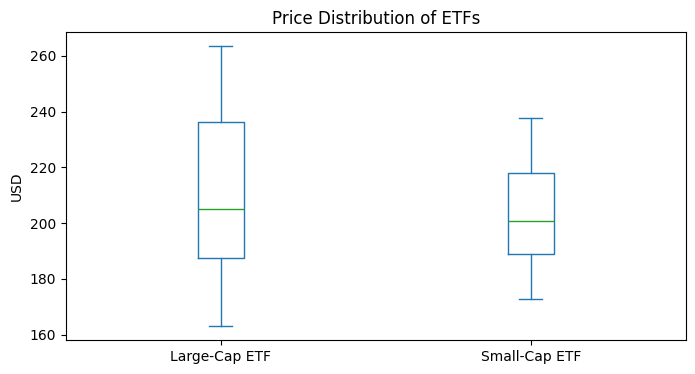

In [46]:
# Visual 2: Boxplot via pandas
merged_df[['Large-Cap ETF', 'Small-Cap ETF']].plot.box(figsize=(8, 4), title='Price Distribution of ETFs', ylabel='USD');

### Results:

In the line chart from October 2022 to October 2024, the Vanguard Large-Cap ETF Index Fund over a period of 2Y has outperformed the Vanguard Small-Cap Index Fund.

The box plot reveals that both the maximum value and the upper quartile of the Large-Cap ETF Index Fund are significantly higher than those of the Small-Cap ETF Fund while having a lower minimum value.

### **5.2:** Reflection


If I had additional time to complete this project, I would seek to broaden my analysis by comparing a wider range of index funds beyond just the ETFs I've analyzed here. This would allow for a more comprehensive understanding of the performance of index funds, allowing inexperienced investors to gain insight and make data driven decisions.